In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from scipy.io import arff
import pandas

data = arff.loadarff('data/Autism-Adolescent-Data Plus Description/Autism-Adolescent-Data.arff')
df = pandas.DataFrame(data[0])

In [4]:
data = df.select_dtypes([object])
data = data.stack().str.decode('utf-8').unstack()

In [5]:
data['A1_Score'] = data['A1_Score'].astype(int)
data['A2_Score'] = data['A2_Score'].astype(int)
data['A3_Score'] = data['A3_Score'].astype(int)
data['A4_Score'] = data['A4_Score'].astype(int)
data['A5_Score'] = data['A5_Score'].astype(int)
data['A6_Score'] = data['A6_Score'].astype(int)
data['A7_Score'] = data['A7_Score'].astype(int)
data['A8_Score'] = data['A8_Score'].astype(int)
data['A9_Score'] = data['A9_Score'].astype(int)
data['A10_Score'] = data['A10_Score'].astype(int)

In [6]:
data = data.applymap(lambda x: np.nan if x == '?' else x)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 19 columns):
A1_Score           104 non-null int64
A2_Score           104 non-null int64
A3_Score           104 non-null int64
A4_Score           104 non-null int64
A5_Score           104 non-null int64
A6_Score           104 non-null int64
A7_Score           104 non-null int64
A8_Score           104 non-null int64
A9_Score           104 non-null int64
A10_Score          104 non-null int64
gender             104 non-null object
ethnicity          98 non-null object
jundice            104 non-null object
austim             104 non-null object
contry_of_res      104 non-null object
used_app_before    104 non-null object
age_desc           104 non-null object
relation           98 non-null object
Class/ASD          104 non-null object
dtypes: int64(10), object(9)
memory usage: 16.2+ KB


In [8]:
data = data.dropna()

In [9]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,m,Hispanic,yes,yes,Austria,no,12-16 years,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,m,Black,no,no,Austria,no,12-16 years,Relative,NO
3,0,1,1,1,1,1,0,1,1,0,f,White-European,no,no,United Kingdom,no,12-16 years,Self,YES
7,1,1,0,1,1,0,1,1,0,1,f,Middle Eastern,no,no,Australia,no,12-16 years,Parent,YES
8,1,1,1,1,1,1,0,0,0,0,m,Black,yes,yes,Bahrain,no,12-16 years,Parent,NO


In [10]:
data['relation'].value_counts()

Self                        45
Parent                      36
Relative                     8
Health care professional     6
Others                       3
Name: relation, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 103
Data columns (total 19 columns):
A1_Score           98 non-null int64
A2_Score           98 non-null int64
A3_Score           98 non-null int64
A4_Score           98 non-null int64
A5_Score           98 non-null int64
A6_Score           98 non-null int64
A7_Score           98 non-null int64
A8_Score           98 non-null int64
A9_Score           98 non-null int64
A10_Score          98 non-null int64
gender             98 non-null object
ethnicity          98 non-null object
jundice            98 non-null object
austim             98 non-null object
contry_of_res      98 non-null object
used_app_before    98 non-null object
age_desc           98 non-null object
relation           98 non-null object
Class/ASD          98 non-null object
dtypes: int64(10), object(9)
memory usage: 15.3+ KB


<AxesSubplot:xlabel='gender', ylabel='count'>

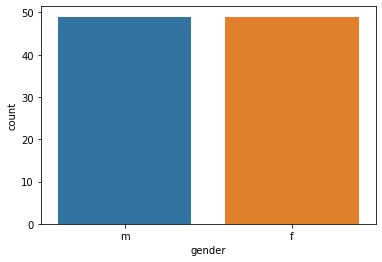

In [12]:
sns.countplot(x=data['gender'])

<AxesSubplot:xlabel='ethnicity', ylabel='count'>

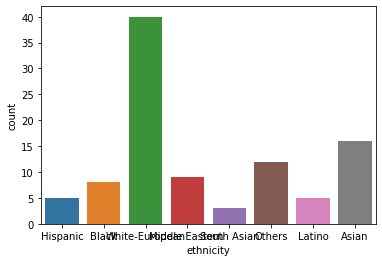

In [13]:
sns.countplot(x=data['ethnicity'])

In [14]:
data['ethnicity'].value_counts()

White-European     40
Asian              16
Others             12
Middle Eastern      9
Black               8
Latino              5
Hispanic            5
South Asian         3
Name: ethnicity, dtype: int64

<AxesSubplot:xlabel='jundice', ylabel='count'>

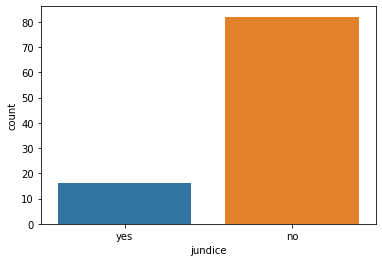

In [15]:
sns.countplot(x=data['jundice'])

<AxesSubplot:xlabel='austim', ylabel='count'>

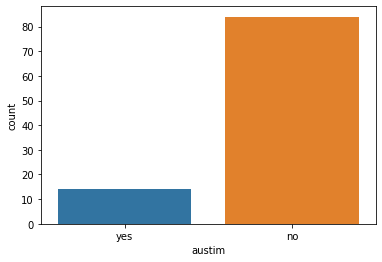

In [16]:
sns.countplot(x=data['austim'])

<AxesSubplot:xlabel='contry_of_res', ylabel='count'>

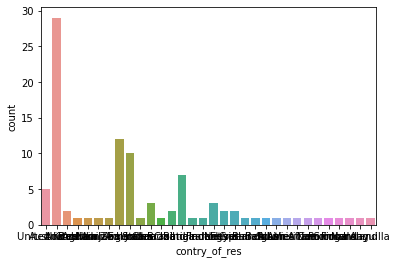

In [17]:
sns.countplot(x=data['contry_of_res'])

In [18]:
data['contry_of_res'].value_counts()

United Kingdom          29
United States           12
Argentina               10
India                    7
Austria                  5
Indonesia                3
Canada                   3
Egypt                    2
Netherlands              2
Australia                2
Croatia                  2
Viet Nam                 1
Comoros                  1
Jordan                   1
Portugal                 1
Ireland                  1
Belgium                  1
Bahamas                  1
Albania                  1
AmericanSamoa            1
France                   1
Anguilla                 1
United Arab Emirates     1
Azerbaijan               1
South Africa             1
Bangladesh               1
Greenland                1
Finland                  1
Bahrain                  1
Brazil                   1
New Zealand              1
Norway                   1
Name: contry_of_res, dtype: int64

<AxesSubplot:xlabel='used_app_before', ylabel='count'>

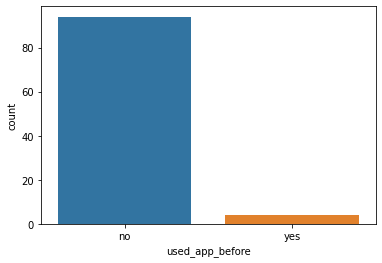

In [19]:
sns.countplot(x=data['used_app_before'])

<AxesSubplot:xlabel='age_desc', ylabel='count'>

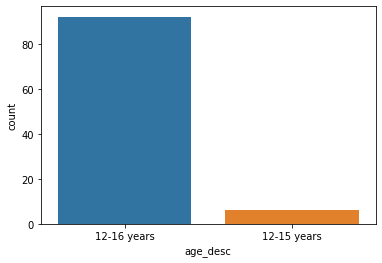

In [20]:
sns.countplot(x=data['age_desc'])

<AxesSubplot:xlabel='relation', ylabel='count'>

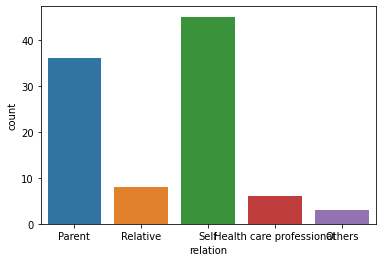

In [21]:
sns.countplot(x=data['relation'])

<AxesSubplot:xlabel='Class/ASD', ylabel='count'>

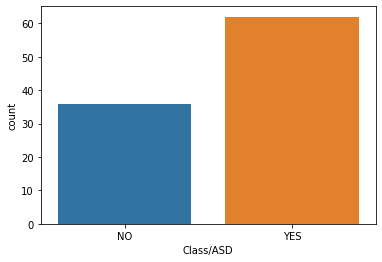

In [22]:
sns.countplot(x=data['Class/ASD'])

In [23]:
data.to_csv('adolescent_processed.csv')

In [24]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['gender']= label_encoder.fit_transform(data['gender'])
data['ethnicity']= label_encoder.fit_transform(data['ethnicity'])
data['jundice']= label_encoder.fit_transform(data['jundice'])
data['austim']= label_encoder.fit_transform(data['austim'])
data['contry_of_res']= label_encoder.fit_transform(data['contry_of_res'])
data['used_app_before']= label_encoder.fit_transform(data['used_app_before'])
data['age_desc']= label_encoder.fit_transform(data['age_desc'])
data['relation']= label_encoder.fit_transform(data['relation'])
data['Class/ASD']= label_encoder.fit_transform(data['Class/ASD'])

data['gender'].unique()
data['ethnicity'].unique()
data['jundice'].unique()
data['austim'].unique()
data['contry_of_res'].unique()
data['used_app_before'].unique()
data['age_desc'].unique()
data['relation'].unique()
data['Class/ASD'].unique()

array([0, 1], dtype=int64)

In [26]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,1,2,1,1,5,0,1,2,0
1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,5,0,1,3,0
3,0,1,1,1,1,1,0,1,1,0,0,7,0,0,29,0,1,4,1
7,1,1,0,1,1,0,1,1,0,1,0,4,0,0,4,0,1,2,1
8,1,1,1,1,1,1,0,0,0,0,1,1,1,1,8,0,1,2,0


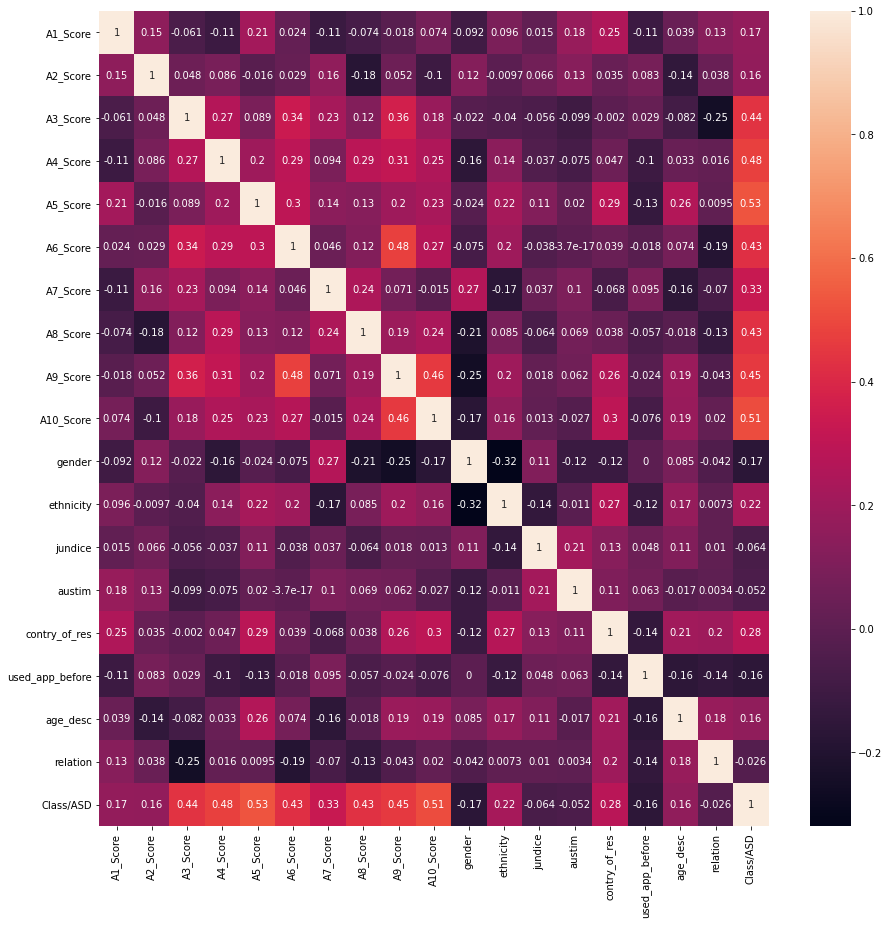

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [28]:
X = data.drop(["Class/ASD"],axis =1)
y = data["Class/ASD"]

In [20]:
X.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc',
       'relation'],
      dtype='object')

# Quantile Transformer

In [16]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_new = qt.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((83, 18), (83,), (21, 18), (21,))

In [18]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.33333333],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.33333333],
       ...,
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.55555556],
       [0.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.33333333],
       [1.        , 1.        , 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [32]:
from sklearn.metrics import log_loss, roc_auc_score, matthews_corrcoef, cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score

In [18]:
ML_Model = []
accuracy = []
roc = []
precision = []
recall = []
f1_scorea = []
mcc = []
kappa = []
loga = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g,h):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    roc.append(round(b, 3))
    precision.append(round(c, 3))
    recall.append(round(d, 3))
    f1_scorea.append(round(e,3))
    mcc.append(round(f,3))
    kappa.append(round(g,3))
    loga.append(round(h,3))


In [19]:
ML_Model1 = []
accuracy1 = []
roc1 = []
precision1 = []
recall1 = []
f1_score1 = []
mcc1 = []
kappa1 = []
log1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d,e,f,g,h):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    roc1.append(round(b, 3))
    precision1.append(round(c, 3))
    recall1.append(round(d, 3))
    f1_score1.append(round(e,3))
    mcc1.append(round(f,3))
    kappa1.append(round(g,3))
    log1.append(round(h,3))


In [20]:
ML_Model2 = []
accuracy2 = []
roc2 = []
precision2 = []
recall2 = []
f1_score2 = []
mcc2 = []
kappa2 = []
log2 = []

#function to call for storing the results
def storeResults2(model, a,b,c,d,e,f,g,h):
    ML_Model2.append(model)
    accuracy2.append(round(a, 3))
    roc2.append(round(b, 3))
    precision2.append(round(c, 3))
    recall2.append(round(d, 3))
    f1_score2.append(round(e,3))
    mcc2.append(round(f,3))
    kappa2.append(round(g,3))
    log2.append(round(h,3))


In [21]:
ML_Model3 = []
accuracy3 = []
roc3 = []
precision3 = []
recall3 = []
f1_score3 = []
mcc3 = []
kappa3 = []
log3 = []

#function to call for storing the results
def storeResults3(model, a,b,c,d,e,f,g,h):
    ML_Model3.append(model)
    accuracy3.append(round(a, 3))
    roc3.append(round(b, 3))
    precision3.append(round(c, 3))
    recall3.append(round(d, 3))
    f1_score3.append(round(e,3))
    mcc3.append(round(f,3))
    kappa3.append(round(g,3))
    log3.append(round(h,3))


# AdaBoost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model 
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)
y_prob = ab.predict_proba(X_test)

ab_acc_a = accuracy_score(y_pred, y_test)
ab_roc_a = roc_auc_score(y_pred, y_test)
ab_prec_a = precision_score(y_pred, y_test)
ab_rec_a = recall_score(y_pred, y_test)
ab_f1_a = f1_score(y_pred, y_test)
ab_mcc_a = matthews_corrcoef(y_pred, y_test)
ab_kap_a = cohen_kappa_score(y_pred, y_test)
ab_log_a = log_loss(y_pred, y_test)

In [23]:
storeResults('AdaBoost Classifier',ab_acc_a,ab_roc_a,ab_prec_a,ab_rec_a,ab_f1_a,ab_mcc_a,ab_kap_a,ab_log_a)

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model 
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

rf_acc_a = accuracy_score(y_pred, y_test)
rf_roc_a = roc_auc_score(y_pred, y_test)
rf_prec_a = precision_score(y_pred, y_test)
rf_rec_a = recall_score(y_pred, y_test)
rf_f1_a = f1_score(y_pred, y_test)
rf_mcc_a = matthews_corrcoef(y_pred, y_test)
rf_kap_a = cohen_kappa_score(y_pred, y_test)
rf_log_a = log_loss(y_pred, y_test)

In [25]:
storeResults('Ransom Forest Classifier',rf_acc_a,rf_roc_a,rf_prec_a,rf_rec_a,rf_f1_a,rf_mcc_a,rf_kap_a,rf_log_a)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)

dt_acc_a = accuracy_score(y_pred, y_test)
dt_roc_a = roc_auc_score(y_pred, y_test)
dt_prec_a = precision_score(y_pred, y_test)
dt_rec_a = recall_score(y_pred, y_test)
dt_f1_a = f1_score(y_pred, y_test)
dt_mcc_a = matthews_corrcoef(y_pred, y_test)
dt_kap_a = cohen_kappa_score(y_pred, y_test)
dt_log_a = log_loss(y_pred, y_test)

In [27]:
storeResults('Decision Tree Classifier',dt_acc_a,dt_roc_a,dt_prec_a,dt_rec_a,dt_f1_a,dt_mcc_a,dt_kap_a,dt_log_a)

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

knn_acc_a = accuracy_score(y_pred, y_test)
knn_roc_a = roc_auc_score(y_pred, y_test)
knn_prec_a = precision_score(y_pred, y_test)
knn_rec_a = recall_score(y_pred, y_test)
knn_f1_a = f1_score(y_pred, y_test)
knn_mcc_a = matthews_corrcoef(y_pred, y_test)
knn_kap_a = cohen_kappa_score(y_pred, y_test)
knn_log_a = log_loss(y_pred, y_test)

In [29]:
storeResults('KNN',knn_acc_a,knn_roc_a,knn_prec_a,knn_rec_a,knn_f1_a,knn_mcc_a,knn_kap_a,knn_log_a)

# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

nb_acc_a = accuracy_score(y_pred, y_test)
nb_roc_a = roc_auc_score(y_pred, y_test)
nb_prec_a = precision_score(y_pred, y_test)
nb_rec_a = recall_score(y_pred, y_test)
nb_f1_a = f1_score(y_pred, y_test)
nb_mcc_a = matthews_corrcoef(y_pred, y_test)
nb_kap_a = cohen_kappa_score(y_pred, y_test)
nb_log_a = log_loss(y_pred, y_test)

In [31]:
storeResults('Naive Bayes',nb_acc_a,nb_roc_a,nb_prec_a,nb_rec_a,nb_f1_a,nb_mcc_a,nb_kap_a,nb_log_a)

# Logistic Regression

In [32]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

y_pred = log.predict(X_test)
y_prob = log.predict_proba(X_test)

lr_acc_a = accuracy_score(y_pred, y_test)
lr_roc_a = roc_auc_score(y_pred, y_test)
lr_prec_a = precision_score(y_pred, y_test)
lr_rec_a = recall_score(y_pred, y_test)
lr_f1_a = f1_score(y_pred, y_test)
lr_mcc_a = matthews_corrcoef(y_pred, y_test)
lr_kap_a = cohen_kappa_score(y_pred, y_test)
lr_log_a = log_loss(y_pred, y_test)

In [33]:
storeResults('Logistic Regression',lr_acc_a,lr_roc_a,lr_prec_a,lr_rec_a,lr_f1_a,lr_mcc_a,lr_kap_a,lr_log_a)

# SVM

In [34]:
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
#y_prob = svc.predict_proba(X_test)

svc_acc_a = accuracy_score(y_pred, y_test)
svc_roc_a = roc_auc_score(y_pred, y_test)
svc_prec_a = precision_score(y_pred, y_test)
svc_rec_a = recall_score(y_pred, y_test)
svc_f1_a = f1_score(y_pred, y_test)
svc_mcc_a = matthews_corrcoef(y_pred, y_test)
svc_kap_a = cohen_kappa_score(y_pred, y_test)
svc_log_a = log_loss(y_pred, y_test)

In [35]:
storeResults('SVC',svc_acc_a,svc_roc_a,svc_prec_a,svc_rec_a,svc_f1_a,svc_mcc_a,svc_kap_a,svc_log_a)

# LDA

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

# fitting the model for grid search
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_prob = svc.predict_proba(X_test)

lda_acc_a = accuracy_score(y_pred, y_test)
lda_roc_a = roc_auc_score(y_pred, y_test)
lda_prec_a = precision_score(y_pred, y_test)
lda_rec_a = recall_score(y_pred, y_test)
lda_f1_a = f1_score(y_pred, y_test)
lda_mcc_a = matthews_corrcoef(y_pred, y_test)
lda_kap_a = cohen_kappa_score(y_pred, y_test)
lda_log_a = log_loss(y_pred, y_test)

In [37]:
storeResults('LDA',lda_acc_a,lda_roc_a,lda_prec_a,lda_rec_a,lda_f1_a,lda_mcc_a,lda_kap_a,lda_log_a)

# Voting Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression()
clf2 = SVC(probability=True)

eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc_a = accuracy_score(y_pred, y_test)
vot_roc_a = roc_auc_score(y_pred, y_test)
vot_prec_a = precision_score(y_pred, y_test)
vot_rec_a = recall_score(y_pred, y_test)
vot_f1_a = f1_score(y_pred, y_test)
vot_mcc_a = matthews_corrcoef(y_pred, y_test)
vot_kap_a = cohen_kappa_score(y_pred, y_test)
vot_log_a = log_loss(y_pred, y_test)


storeResults('Voting Classifier',vot_acc_a,vot_roc_a,vot_prec_a,vot_rec_a,vot_f1_a,vot_mcc_a,vot_kap_a,vot_log_a)

# Comparison

In [39]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'ROC score' : roc,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1_scorea,
                        'MCC' : mcc,
                        'Kappa Score' : kappa,
                       'Log Loss' : loga
                      })

In [40]:
result

,ML Model,Accuracy,ROC score,Precision,Recall,F1-Score,MCC,Kappa Score,Log Loss
0,AdaBoost Classifier,0.810,0.805,0.769,0.909,0.833,0.626,0.615,6.579
1,Ransom Forest Classifier,0.857,0.847,0.846,0.917,0.880,0.708,0.704,4.934
2,Decision Tree Classifier,0.810,0.805,0.769,0.909,0.833,0.626,0.615,6.579
3,KNN,0.857,0.906,1.000,0.812,0.897,0.713,0.674,4.934
4,Naive Bayes,0.762,0.750,0.769,0.833,0.800,0.510,0.507,8.224
5,Logistic Regression,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
6,SVC,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
7,LDA,0.857,0.847,0.846,0.917,0.880,0.708,0.704,4.934
8,Voting Classifier,0.952,0.944,0.923,1.000,0.960,0.906,0.901,1.645


In [41]:
import joblib
filename = 'Model/model_Adolescent_qt.sav'
joblib.dump(eclf1, filename)

['Model/model_Adolescent_qt.sav']

# Power Transformer

In [42]:
X = data.drop(["Class/ASD"],axis =1)
y = data["Class/ASD"]

In [43]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [44]:
X_new = pt.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((83, 18), (83,), (21, 18), (21,))

# AdaBoost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model 
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)
y_prob = ab.predict_proba(X_test)

ab_acc_b = accuracy_score(y_pred, y_test)
ab_roc_b = roc_auc_score(y_pred, y_test)
ab_prec_b = precision_score(y_pred, y_test)
ab_rec_b = recall_score(y_pred, y_test)
ab_f1_b = f1_score(y_pred, y_test)
ab_mcc_b = matthews_corrcoef(y_pred, y_test)
ab_kap_b = cohen_kappa_score(y_pred, y_test)
ab_log_b = log_loss(y_pred, y_test)

In [47]:
storeResults1('AdaBoost',ab_acc_b,ab_roc_b,ab_prec_b,ab_rec_b,ab_f1_b,ab_mcc_b,ab_kap_b,ab_log_b)

# Random FOrest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model 
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

rf_acc_b = accuracy_score(y_pred, y_test)
rf_roc_b = roc_auc_score(y_pred, y_test)
rf_prec_b = precision_score(y_pred, y_test)
rf_rec_b = recall_score(y_pred, y_test)
rf_f1_b = f1_score(y_pred, y_test)
rf_mcc_b = matthews_corrcoef(y_pred, y_test)
rf_kap_b = cohen_kappa_score(y_pred, y_test)
rf_log_b = log_loss(y_pred, y_test)

In [49]:
storeResults1('Random Forest',rf_acc_b,rf_roc_b,rf_prec_b,rf_rec_b,rf_f1_b,rf_mcc_b,rf_kap_b,rf_log_b)

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)

dt_acc_b = accuracy_score(y_pred, y_test)
dt_roc_b = roc_auc_score(y_pred, y_test)
dt_prec_b = precision_score(y_pred, y_test)
dt_rec_b = recall_score(y_pred, y_test)
dt_f1_b = f1_score(y_pred, y_test)
dt_mcc_b = matthews_corrcoef(y_pred, y_test)
dt_kap_b = cohen_kappa_score(y_pred, y_test)
dt_log_b = log_loss(y_pred, y_test)

In [51]:
storeResults1('Decision Tree',dt_acc_b,dt_roc_b,dt_prec_b,dt_rec_b,dt_f1_b,dt_mcc_b,dt_kap_b,dt_log_b)

# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

knn_acc_b = accuracy_score(y_pred, y_test)
knn_roc_b = roc_auc_score(y_pred, y_test)
knn_prec_b = precision_score(y_pred, y_test)
knn_rec_b = recall_score(y_pred, y_test)
knn_f1_b = f1_score(y_pred, y_test)
knn_mcc_b = matthews_corrcoef(y_pred, y_test)
knn_kap_b = cohen_kappa_score(y_pred, y_test)
knn_log_b = log_loss(y_pred, y_test)

In [53]:
storeResults1('KNN',knn_acc_b,knn_roc_b,knn_prec_b,knn_rec_b,knn_f1_b,knn_mcc_b,knn_kap_b,knn_log_b)

# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

nb_acc_b = accuracy_score(y_pred, y_test)
nb_roc_b = roc_auc_score(y_pred, y_test)
nb_prec_b = precision_score(y_pred, y_test)
nb_rec_b = recall_score(y_pred, y_test)
nb_f1_b = f1_score(y_pred, y_test)
nb_mcc_b = matthews_corrcoef(y_pred, y_test)
nb_kap_b = cohen_kappa_score(y_pred, y_test)
nb_log_b = log_loss(y_pred, y_test)

In [55]:
storeResults1('Naive Bayes',nb_acc_b,nb_roc_b,nb_prec_b,nb_rec_b,nb_f1_b,nb_mcc_b,nb_kap_b,nb_log_b)

# Logistic Regession

In [56]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

y_pred = log.predict(X_test)
y_prob = log.predict_proba(X_test)

lr_acc_b = accuracy_score(y_pred, y_test)
lr_roc_b = roc_auc_score(y_pred, y_test)
lr_prec_b = precision_score(y_pred, y_test)
lr_rec_b = recall_score(y_pred, y_test)
lr_f1_b = f1_score(y_pred, y_test)
lr_mcc_b = matthews_corrcoef(y_pred, y_test)
lr_kap_b = cohen_kappa_score(y_pred, y_test)
lr_log_b = log_loss(y_pred, y_test)

In [57]:
storeResults1('Logistic Regression',lr_acc_b,lr_roc_b,lr_prec_b,lr_rec_b,lr_f1_b,lr_mcc_b,lr_kap_b,lr_log_b)

# SVM

In [58]:
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
#y_prob = svc.predict_proba(X_test)

svc_acc_b = accuracy_score(y_pred, y_test)
svc_roc_b = roc_auc_score(y_pred, y_test)
svc_prec_b = precision_score(y_pred, y_test)
svc_rec_b = recall_score(y_pred, y_test)
svc_f1_b = f1_score(y_pred, y_test)
svc_mcc_b = matthews_corrcoef(y_pred, y_test)
svc_kap_b = cohen_kappa_score(y_pred, y_test)
svc_log_b = log_loss(y_pred, y_test)

In [59]:
storeResults1('SVM',svc_acc_b,svc_roc_b,svc_prec_b,svc_rec_b,svc_f1_b,svc_mcc_b,svc_kap_b,svc_log_b)

# LDA

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

# fitting the model for grid search
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_prob = svc.predict_proba(X_test)

lda_acc_b = accuracy_score(y_pred, y_test)
lda_roc_b = roc_auc_score(y_pred, y_test)
lda_prec_b = precision_score(y_pred, y_test)
lda_rec_b = recall_score(y_pred, y_test)
lda_f1_b = f1_score(y_pred, y_test)
lda_mcc_b = matthews_corrcoef(y_pred, y_test)
lda_kap_b = cohen_kappa_score(y_pred, y_test)
lda_log_b = log_loss(y_pred, y_test)

In [61]:
storeResults1('LDA',lda_acc_b,lda_roc_b,lda_prec_b,lda_rec_b,lda_f1_b,lda_mcc_b,lda_kap_b,lda_log_b)

# Voting CLassifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression()
clf2 = SVC(probability=True)
eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc_b = accuracy_score(y_pred, y_test)
vot_roc_b = roc_auc_score(y_pred, y_test)
vot_prec_b = precision_score(y_pred, y_test)
vot_rec_b = recall_score(y_pred, y_test)
vot_f1_b = f1_score(y_pred, y_test)
vot_mcc_b = matthews_corrcoef(y_pred, y_test)
vot_kap_b = cohen_kappa_score(y_pred, y_test)
vot_log_b = log_loss(y_pred, y_test)


storeResults1('Voting Classifier',vot_acc_b,vot_roc_b,vot_prec_b,vot_rec_b,vot_f1_b,vot_mcc_b,vot_kap_b,vot_log_b)

In [63]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                        'ROC score' : roc1,
                        'Precision': precision1,
                        'Recall'   : recall1,
                        'F1-Score': f1_score1,
                        'MCC' : mcc1,
                        'Kappa Score' : kappa1,
                       'Log Loss' : log1
                      })

In [64]:
result

,ML Model,Accuracy,ROC score,Precision,Recall,F1-Score,MCC,Kappa Score,Log Loss
0,AdaBoost,0.810,0.805,0.769,0.909,0.833,0.626,0.615,6.579
1,Random Forest,0.810,0.798,0.846,0.846,0.846,0.596,0.596,6.579
2,Decision Tree,0.810,0.805,0.769,0.909,0.833,0.626,0.615,6.579
3,KNN,0.810,0.882,1.000,0.765,0.867,0.618,0.553,6.579
4,Naive Bayes,0.762,0.750,0.769,0.833,0.800,0.510,0.507,8.224
5,Logistic Regression,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
6,SVM,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
7,LDA,0.905,0.899,0.923,0.923,0.923,0.798,0.798,3.289
8,Voting Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000


In [65]:
import joblib
filename = 'Model/model_Adolescent_pt.sav'
joblib.dump(eclf1, filename)

['Model/model_Adolescent_pt.sav']

# MaxAbsScaler - MAS

In [66]:
X = data.drop(["Class/ASD"],axis =1)
y = data["Class/ASD"]

In [67]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler()
X_new = transformer.fit_transform(X)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((83, 18), (83,), (21, 18), (21,))

# AdaBoost Classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model 
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)
y_prob = ab.predict_proba(X_test)

ab_acc_c = accuracy_score(y_pred, y_test)
ab_roc_c = roc_auc_score(y_pred, y_test)
ab_prec_c = precision_score(y_pred, y_test)
ab_rec_c = recall_score(y_pred, y_test)
ab_f1_c = f1_score(y_pred, y_test)
ab_mcc_c = matthews_corrcoef(y_pred, y_test)
ab_kap_c = cohen_kappa_score(y_pred, y_test)
ab_log_c = log_loss(y_pred, y_test)

In [70]:
storeResults2('AdaBoost',ab_acc_c,ab_roc_c,ab_prec_c,ab_rec_c,ab_f1_c,ab_mcc_c,ab_kap_c,ab_log_c)

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model 
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

rf_acc_c = accuracy_score(y_pred, y_test)
rf_roc_c = roc_auc_score(y_pred, y_test)
rf_prec_c = precision_score(y_pred, y_test)
rf_rec_c = recall_score(y_pred, y_test)
rf_f1_c = f1_score(y_pred, y_test)
rf_mcc_c = matthews_corrcoef(y_pred, y_test)
rf_kap_c = cohen_kappa_score(y_pred, y_test)
rf_log_c = log_loss(y_pred, y_test)

In [72]:
storeResults2('Random FOrest',rf_acc_c,rf_roc_c,rf_prec_c,rf_rec_c,rf_f1_c,rf_mcc_c,rf_kap_c,rf_log_c)

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)

dt_acc_c = accuracy_score(y_pred, y_test)
dt_roc_c = roc_auc_score(y_pred, y_test)
dt_prec_c = precision_score(y_pred, y_test)
dt_rec_c = recall_score(y_pred, y_test)
dt_f1_c = f1_score(y_pred, y_test)
dt_mcc_c = matthews_corrcoef(y_pred, y_test)
dt_kap_c = cohen_kappa_score(y_pred, y_test)
dt_log_c = log_loss(y_pred, y_test)

In [74]:
storeResults2('Decision Tree',dt_acc_c,dt_roc_c,dt_prec_c,dt_rec_c,dt_f1_c,dt_mcc_c,dt_kap_c,dt_log_c)

# KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

knn_acc_c = accuracy_score(y_pred, y_test)
knn_roc_c = roc_auc_score(y_pred, y_test)
knn_prec_c = precision_score(y_pred, y_test)
knn_rec_c = recall_score(y_pred, y_test)
knn_f1_c = f1_score(y_pred, y_test)
knn_mcc_c = matthews_corrcoef(y_pred, y_test)
knn_kap_c = cohen_kappa_score(y_pred, y_test)
knn_log_c = log_loss(y_pred, y_test)

In [76]:
storeResults2('KNN',knn_acc_c,knn_roc_c,knn_prec_c,knn_rec_c,knn_f1_c,knn_mcc_c,knn_kap_c,knn_log_c)

# Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

nb_acc_c = accuracy_score(y_pred, y_test)
nb_roc_c = roc_auc_score(y_pred, y_test)
nb_prec_c = precision_score(y_pred, y_test)
nb_rec_c = recall_score(y_pred, y_test)
nb_f1_c = f1_score(y_pred, y_test)
nb_mcc_c = matthews_corrcoef(y_pred, y_test)
nb_kap_c = cohen_kappa_score(y_pred, y_test)
nb_log_c = log_loss(y_pred, y_test)

In [78]:
storeResults2('Naive Bayes',nb_acc_c,nb_roc_c,nb_prec_c,nb_rec_c,nb_f1_c,nb_mcc_c,nb_kap_c,nb_log_c)

# Logistic Regression

In [79]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

y_pred = log.predict(X_test)
y_prob = log.predict_proba(X_test)

lr_acc_c = accuracy_score(y_pred, y_test)
lr_roc_c = roc_auc_score(y_pred, y_test)
lr_prec_c = precision_score(y_pred, y_test)
lr_rec_c = recall_score(y_pred, y_test)
lr_f1_c = f1_score(y_pred, y_test)
lr_mcc_c = matthews_corrcoef(y_pred, y_test)
lr_kap_c = cohen_kappa_score(y_pred, y_test)
lr_log_c = log_loss(y_pred, y_test)

In [80]:
storeResults2('Logistic Regression',lr_acc_c,lr_roc_c,lr_prec_c,lr_rec_c,lr_f1_c,lr_mcc_c,lr_kap_c,lr_log_c)

# SVC

In [81]:
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
#y_prob = svc.predict_proba(X_test)

svc_acc_c = accuracy_score(y_pred, y_test)
svc_roc_c = roc_auc_score(y_pred, y_test)
svc_prec_c = precision_score(y_pred, y_test)
svc_rec_c = recall_score(y_pred, y_test)
svc_f1_c = f1_score(y_pred, y_test)
svc_mcc_c = matthews_corrcoef(y_pred, y_test)
svc_kap_c = cohen_kappa_score(y_pred, y_test)
svc_log_c = log_loss(y_pred, y_test)

In [82]:
storeResults2('SVC',svc_acc_c,svc_roc_c,svc_prec_c,svc_rec_c,svc_f1_c,svc_mcc_c,svc_kap_c,svc_log_c)

# LDA

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

# fitting the model for grid search
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_prob = svc.predict_proba(X_test)

lda_acc_c = accuracy_score(y_pred, y_test)
lda_roc_c = roc_auc_score(y_pred, y_test)
lda_prec_c = precision_score(y_pred, y_test)
lda_rec_c = recall_score(y_pred, y_test)
lda_f1_c = f1_score(y_pred, y_test)
lda_mcc_c = matthews_corrcoef(y_pred, y_test)
lda_kap_c = cohen_kappa_score(y_pred, y_test)
lda_log_c = log_loss(y_pred, y_test)

In [84]:
storeResults2('LDA',lda_acc_c,lda_roc_c,lda_prec_c,lda_rec_c,lda_f1_c,lda_mcc_c,lda_kap_c,lda_log_c)

# Voting Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression()
clf2 = SVC(probability=True)
eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X, y)
y_pred = eclf1.predict(X)



In [ ]:
vot_acc_c = accuracy_score(y_pred, y_test)
vot_roc_c = roc_auc_score(y_pred, y_test)
vot_prec_c = precision_score(y_pred, y_test)
vot_rec_c = recall_score(y_pred, y_test)
vot_f1_c = f1_score(y_pred, y_test)
vot_mcc_c = matthews_corrcoef(y_pred, y_test)
vot_kap_c = cohen_kappa_score(y_pred, y_test)
vot_log_c = log_loss(y_pred, y_test)


#storeResults2('Voting Classifier',vot_acc_c,vot_roc_c,vot_prec_c,vot_rec_c,vot_f1_c,vot_mcc_c,vot_kap_c,vot_log_c)

In [86]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model2,
                        'Accuracy' : accuracy2,
                        'ROC score' : roc2,
                        'Precision': precision2,
                        'Recall'   : recall2,
                        'F1-Score': f1_score2,
                        'MCC' : mcc2,
                        'Kappa Score' : kappa2,
                       'Log Loss' : log2
                      })

In [87]:
result

,ML Model,Accuracy,ROC score,Precision,Recall,F1-Score,MCC,Kappa Score,Log Loss
0,AdaBoost,0.810,0.805,0.769,0.909,0.833,0.626,0.615,6.579
1,Random FOrest,0.857,0.847,0.846,0.917,0.880,0.708,0.704,4.934
2,Decision Tree,0.857,0.847,0.846,0.917,0.880,0.708,0.704,4.934
3,KNN,0.857,0.906,1.000,0.812,0.897,0.713,0.674,4.934
4,Naive Bayes,0.762,0.750,0.769,0.833,0.800,0.510,0.507,8.224
5,Logistic Regression,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
6,SVC,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
7,LDA,0.905,0.899,0.923,0.923,0.923,0.798,0.798,3.289
8,Voting Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000


In [88]:
import joblib
filename = 'Model/model_Adolescent_mas.sav'
joblib.dump(eclf1, filename)

['Model/model_Adolescent_mas.sav']

# Normalizer

In [29]:
X = data.drop(["Class/ASD"],axis =1)
y = data["Class/ASD"]

In [30]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
X_new = transformer.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.15, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((83, 18), (83,), (15, 18), (15,))

# AdaBoost Classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model 
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)
y_prob = ab.predict_proba(X_test)

ab_acc_d = accuracy_score(y_pred, y_test)
ab_roc_d = roc_auc_score(y_pred, y_test)
ab_prec_d = precision_score(y_pred, y_test)
ab_rec_d = recall_score(y_pred, y_test)
ab_f1_d = f1_score(y_pred, y_test)
ab_mcc_d = matthews_corrcoef(y_pred, y_test)
ab_kap_d = cohen_kappa_score(y_pred, y_test)
ab_log_d = log_loss(y_pred, y_test)

In [93]:
storeResults3('AdaBoost',ab_acc_d,ab_roc_d,ab_prec_d,ab_rec_d,ab_f1_d,ab_mcc_d,ab_kap_d,ab_log_d)

# Random FOrest

In [94]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model 
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

rf_acc_d = accuracy_score(y_pred, y_test)
rf_roc_d = roc_auc_score(y_pred, y_test)
rf_prec_d = precision_score(y_pred, y_test)
rf_rec_d = recall_score(y_pred, y_test)
rf_f1_d = f1_score(y_pred, y_test)
rf_mcc_d = matthews_corrcoef(y_pred, y_test)
rf_kap_d = cohen_kappa_score(y_pred, y_test)
rf_log_d = log_loss(y_pred, y_test)

In [95]:
storeResults3('Random Forest',rf_acc_d,rf_roc_d,rf_prec_d,rf_rec_d,rf_f1_d,rf_mcc_d,rf_kap_d,rf_log_d)

# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)

dt_acc_d = accuracy_score(y_pred, y_test)
dt_roc_d = roc_auc_score(y_pred, y_test)
dt_prec_d = precision_score(y_pred, y_test)
dt_rec_d = recall_score(y_pred, y_test)
dt_f1_d = f1_score(y_pred, y_test)
dt_mcc_d = matthews_corrcoef(y_pred, y_test)
dt_kap_d = cohen_kappa_score(y_pred, y_test)
dt_log_d = log_loss(y_pred, y_test)

In [97]:
storeResults3('Decision Tree',dt_acc_d,dt_roc_d,dt_prec_d,dt_rec_d,dt_f1_d,dt_mcc_d,dt_kap_d,dt_log_d)

# KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

knn_acc_d = accuracy_score(y_pred, y_test)
knn_roc_d = roc_auc_score(y_pred, y_test)
knn_prec_d = precision_score(y_pred, y_test)
knn_rec_d = recall_score(y_pred, y_test)
knn_f1_d = f1_score(y_pred, y_test)
knn_mcc_d = matthews_corrcoef(y_pred, y_test)
knn_kap_d = cohen_kappa_score(y_pred, y_test)
knn_log_d = log_loss(y_pred, y_test)

In [99]:
storeResults3('KNN',knn_acc_d,knn_roc_d,knn_prec_d,knn_rec_d,knn_f1_d,knn_mcc_d,knn_kap_d,knn_log_d)

# Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)


nb_acc_d = accuracy_score(y_pred, y_test)
nb_roc_d = roc_auc_score(y_pred, y_test)
nb_prec_d = precision_score(y_pred, y_test)
nb_rec_d = recall_score(y_pred, y_test)
nb_f1_d = f1_score(y_pred, y_test)
nb_mcc_d = matthews_corrcoef(y_pred, y_test)
nb_kap_d = cohen_kappa_score(y_pred, y_test)
nb_log_d = log_loss(y_pred, y_test)

In [101]:
storeResults3('Naive Bayes',nb_acc_d,nb_roc_d,nb_prec_d,nb_rec_d,nb_f1_d,nb_mcc_d,nb_kap_d,nb_log_d)

# Logistic Regression

In [102]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

y_pred = log.predict(X_train)


lr_acc_d = accuracy_score(y_pred, y_train)
lr_roc_d = roc_auc_score(y_pred, y_train)
lr_prec_d = precision_score(y_pred, y_train)
lr_rec_d = recall_score(y_pred, y_train)
lr_f1_d = f1_score(y_pred, y_train)
lr_mcc_d = matthews_corrcoef(y_pred, y_train)
lr_kap_d = cohen_kappa_score(y_pred, y_train)
lr_log_d = log_loss(y_pred, y_train)

In [103]:
storeResults3('Logistic Regression',lr_acc_d,lr_roc_d,lr_prec_d,lr_rec_d,lr_f1_d,lr_mcc_d,lr_kap_d,lr_log_d)

# SVC

In [104]:
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
#y_prob = svc.predict_proba(X_test)

svc_acc_d = accuracy_score(y_pred, y_test)
svc_roc_d = roc_auc_score(y_pred, y_test)
svc_prec_d = precision_score(y_pred, y_test)
svc_rec_d = recall_score(y_pred, y_test)
svc_f1_d = f1_score(y_pred, y_test)
svc_mcc_d = matthews_corrcoef(y_pred, y_test)
svc_kap_d = cohen_kappa_score(y_pred, y_test)
svc_log_d = log_loss(y_pred, y_test)

In [105]:
storeResults3('SVC',svc_acc_d,svc_roc_d,svc_prec_d,svc_rec_d,svc_f1_d,svc_mcc_d,svc_kap_d,svc_log_d)

# LDA

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

# fitting the model for grid search
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_prob = svc.predict_proba(X_test)

lda_acc_d = accuracy_score(y_pred, y_test)
lda_roc_d = roc_auc_score(y_pred, y_test)
lda_prec_d = precision_score(y_pred, y_test)
lda_rec_d = recall_score(y_pred, y_test)
lda_f1_d = f1_score(y_pred, y_test)
lda_mcc_d = matthews_corrcoef(y_pred, y_test)
lda_kap_d = cohen_kappa_score(y_pred, y_test)
lda_log_d = log_loss(y_pred, y_test)

In [107]:
storeResults3('LDA',lda_acc_d,lda_roc_d,lda_prec_d,lda_rec_d,lda_f1_d,lda_mcc_d,lda_kap_d,lda_log_d)

# Voting Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_test, y_test)
y_pred = eclf1.predict(X_test)

vot_acc_d = accuracy_score(y_pred, y_test)
vot_roc_d = roc_auc_score(y_pred, y_test)
vot_prec_d = precision_score(y_pred, y_test)
vot_rec_d = recall_score(y_pred, y_test)
vot_f1_d = f1_score(y_pred, y_test)
vot_mcc_d = matthews_corrcoef(y_pred, y_test)
vot_kap_d = cohen_kappa_score(y_pred, y_test)
vot_log_d = log_loss(y_pred, y_test)


storeResults3('Voting Classifier',vot_acc_d,vot_roc_d,vot_prec_d,vot_rec_d,vot_f1_d,vot_mcc_d,vot_kap_d,vot_log_d)

In [109]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model3,
                        'Accuracy' : accuracy3,
                        'ROC score' : roc3,
                        'Precision': precision3,
                        'Recall'   : recall3,
                        'F1-Score': f1_score3,
                        'MCC' : mcc3,
                        'Kappa Score' : kappa3,
                       'Log Loss' : log3
                      })

In [110]:
result

,ML Model,Accuracy,ROC score,Precision,Recall,F1-Score,MCC,Kappa Score,Log Loss
0,AdaBoost,0.938,0.917,0.909,1.000,0.952,0.870,0.862,2.159
1,Random Forest,0.938,0.917,0.909,1.000,0.952,0.870,0.862,2.159
2,Decision Tree,0.812,0.792,0.909,0.833,0.870,0.545,0.538,6.476
3,KNN,0.625,0.333,0.909,0.667,0.769,-0.174,-0.116,12.952
4,Naive Bayes,0.688,0.607,0.909,0.714,0.800,0.153,0.130,10.793
5,Logistic Regression,0.659,0.697,0.942,0.645,0.766,0.276,0.214,11.775
6,SVC,0.625,0.333,0.909,0.667,0.769,-0.174,-0.116,12.952
7,LDA,0.750,0.718,0.909,0.769,0.833,0.367,0.347,8.635
8,Voting Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000


In [111]:
import joblib
filename = 'Model/model_Adolescent_norm.sav'
joblib.dump(eclf1, filename)

['Model/model_Adolescent_norm.sav']

# Graph

In [112]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# QT

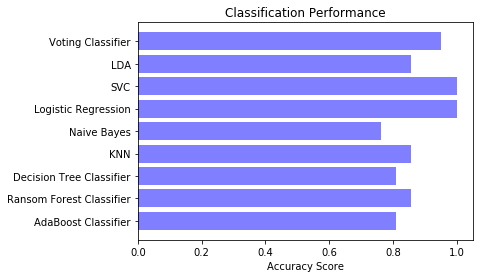

In [113]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

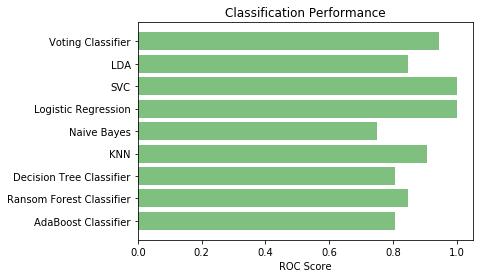

In [114]:
plt2.barh(y_pos, roc, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

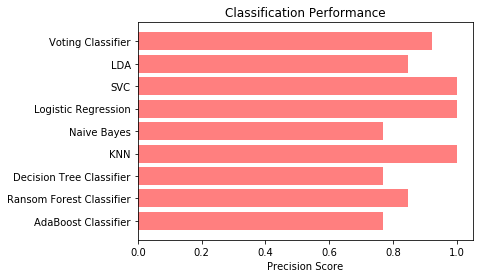

In [115]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

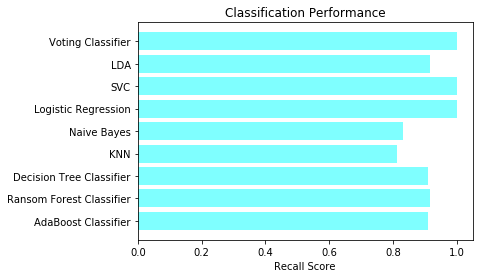

In [116]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

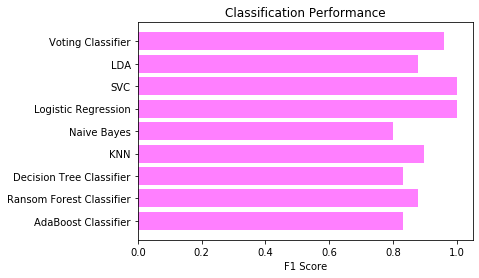

In [117]:
plt2.barh(y_pos, f1_scorea, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

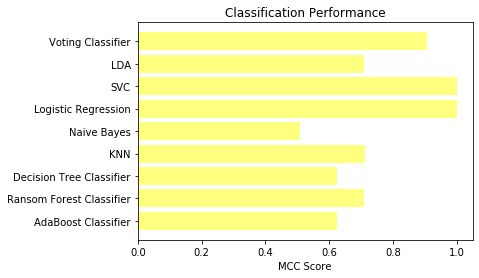

In [118]:
plt2.barh(y_pos, mcc, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

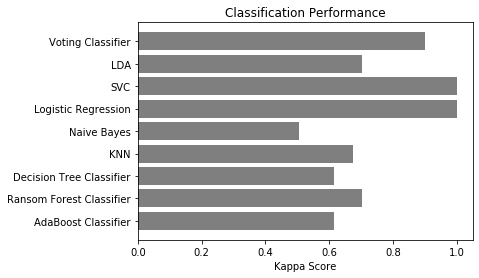

In [119]:
plt2.barh(y_pos, kappa, align='center', alpha=0.5,color='black')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

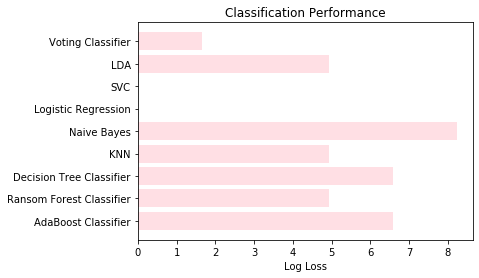

In [120]:
plt2.barh(y_pos, loga, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Log Loss')
plt2.title('Classification Performance')
plt2.show()

# PT

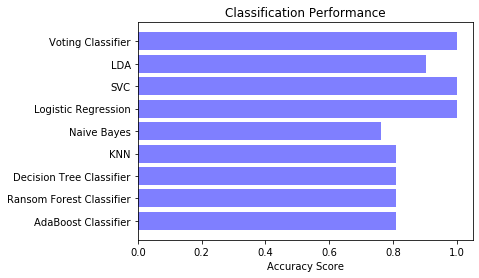

In [121]:
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

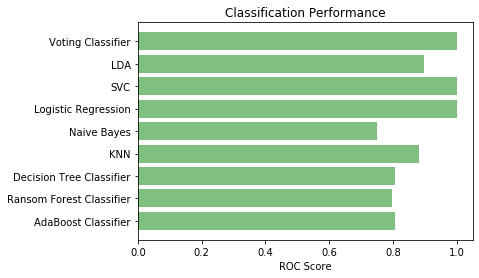

In [122]:
plt2.barh(y_pos, roc1, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

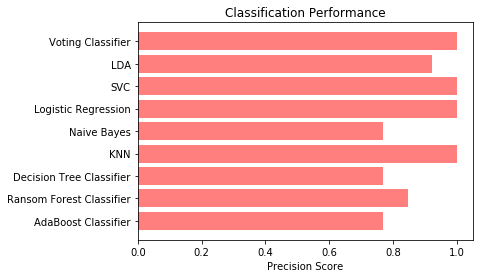

In [123]:
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

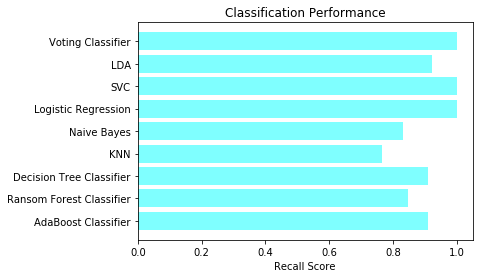

In [124]:
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

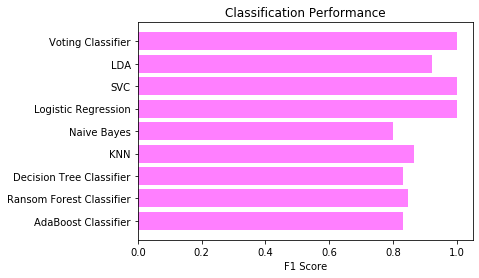

In [125]:
plt2.barh(y_pos, f1_score1, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

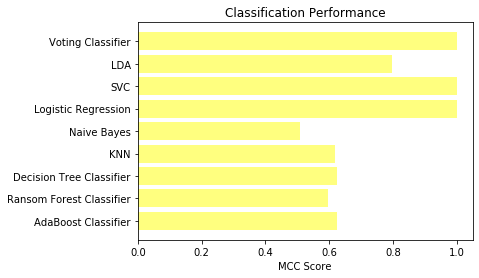

In [126]:
plt2.barh(y_pos, mcc1, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

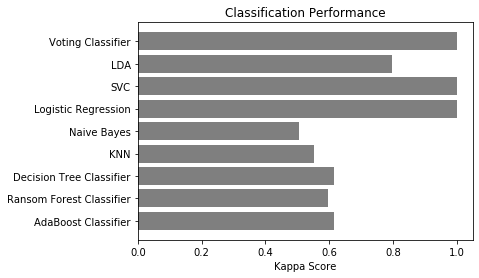

In [127]:
plt2.barh(y_pos, kappa1, align='center', alpha=0.5,color='black')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

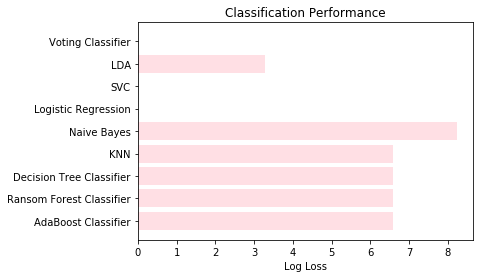

In [128]:
plt2.barh(y_pos, log1, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Log Loss')
plt2.title('Classification Performance')
plt2.show()

# MAS 

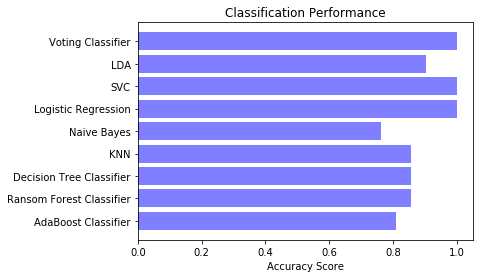

In [129]:
plt2.barh(y_pos, accuracy2, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

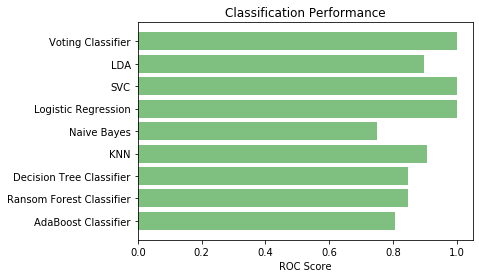

In [130]:
plt2.barh(y_pos, roc2, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

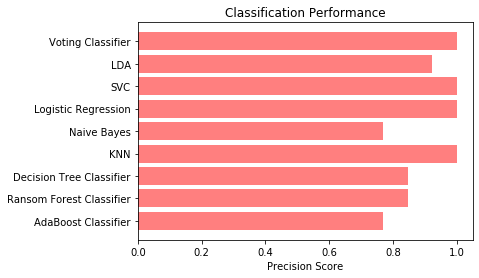

In [131]:
plt2.barh(y_pos, precision2, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

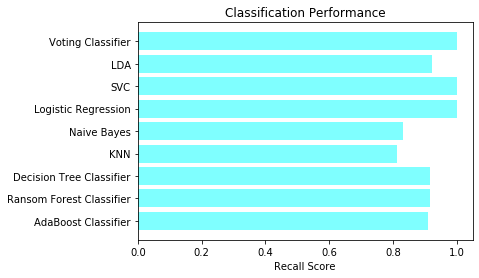

In [132]:
plt2.barh(y_pos, recall2, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

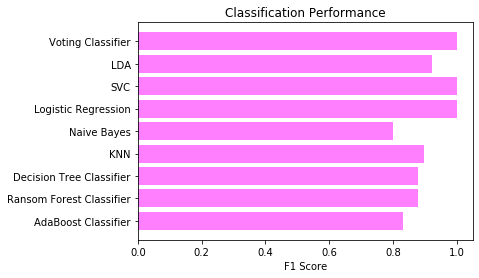

In [133]:
plt2.barh(y_pos, f1_score2, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

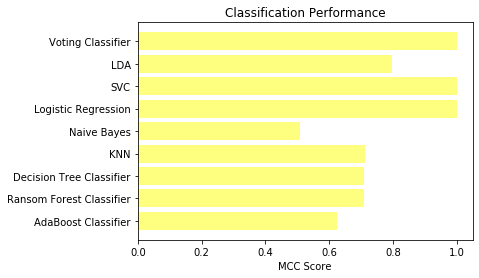

In [134]:
plt2.barh(y_pos, mcc2, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

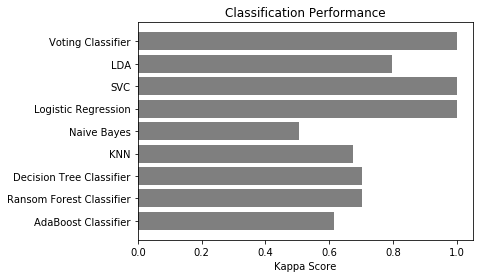

In [135]:
plt2.barh(y_pos, kappa2, align='center', alpha=0.5,color='black')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

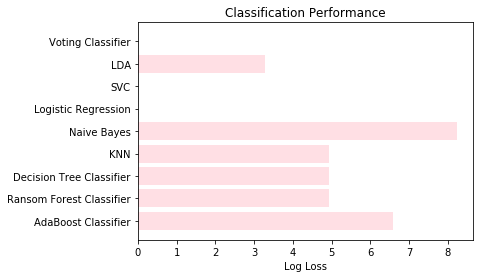

In [136]:
plt2.barh(y_pos, log2, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Log Loss')
plt2.title('Classification Performance')
plt2.show()

# Normalizer

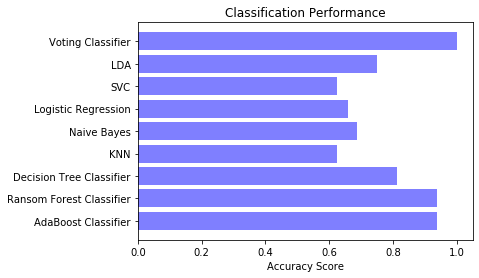

In [137]:
plt2.barh(y_pos, accuracy3, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

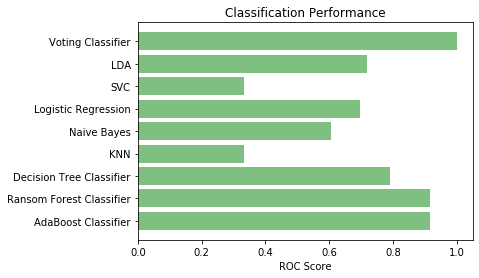

In [138]:
plt2.barh(y_pos, roc3, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

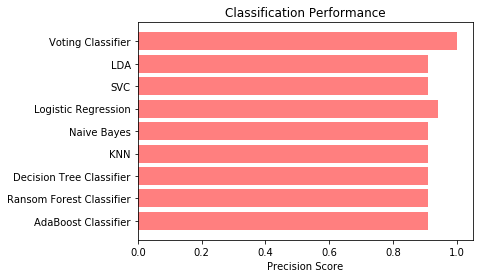

In [139]:
plt2.barh(y_pos, precision3, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

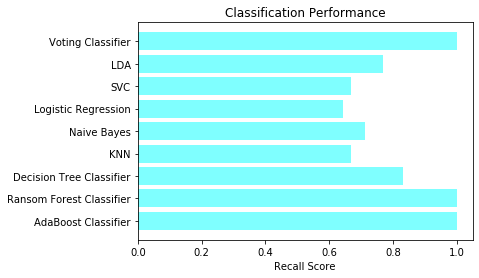

In [140]:
plt2.barh(y_pos, recall3, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

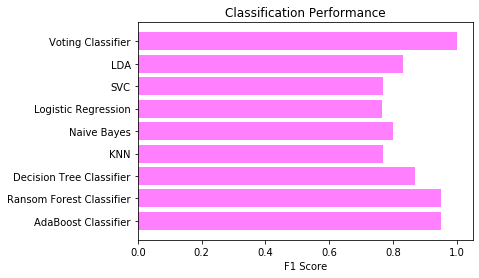

In [141]:
plt2.barh(y_pos, f1_score3, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

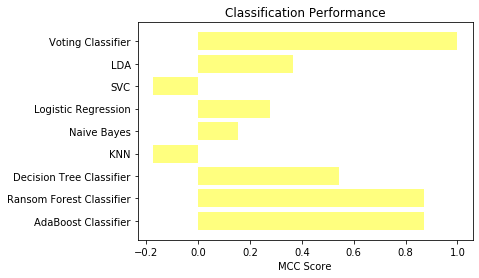

In [142]:
plt2.barh(y_pos, mcc3, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

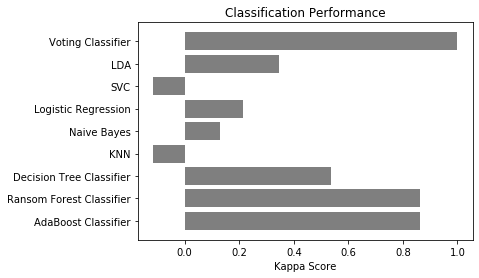

In [143]:
plt2.barh(y_pos, kappa3, align='center', alpha=0.5,color='black')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

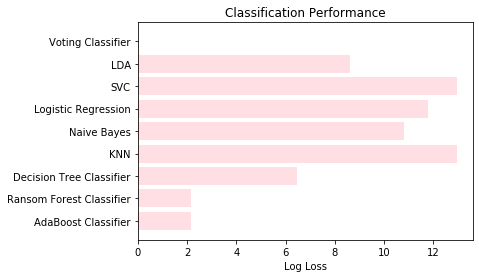

In [144]:
plt2.barh(y_pos, log3, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Log Loss')
plt2.title('Classification Performance')
plt2.show()